## PART I - FEATURE EXTRACTION

In [3]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [ ]:
class features:
    
    def getDomain(self,url):  
        domain = urlparse(url).netloc
        if re.match(r"^www.",domain):
            domain = domain.replace("www.","")
        return domain


    def havingIP(self,url):
        try:
            ipaddress.ip_address(url)
            ip = 1
        except:
            ip = 0
        return ip


    def haveAtSign(self,url):
        if "@" in url:
            at = 1    
        else:
            at = 0    
        return at
    
    
    def getLength(self,url):
        
        if len(url) < 54:
            length = 0            
        else:
            length = 1            
        return length
    
    def getDepth(self,url):
        s = urlparse(url).path.split('/')
        depth = 0
        for j in range(len(s)):
            if len(s[j]) != 0:
                depth = depth+1
        return depth
    
    
    def redirection(self,url):
        pos = url.rfind('//')
        if pos == 6 or pos == 7:
            return 0
        else:
            return 1
            
            
    def httpDomain(self,url):
        domain = urlparse(url).netloc
        if 'https' in domain:
            return 1
        else:
            return 0
        
        
    
    
    
    def tinyURL(self,url):
        shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"
        match=re.search(shortening_services,url)
        if match:
            return 1
        else:
            return 0
        
        
    def prefixSuffix(self,url):
        if '-' in urlparse(url).netloc:
            return 1            
        else:
            return 0 
        
        
        
    def web_traffic(self,url):
        try:
            url = urllib.parse.quote(url)
            rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find(
        "REACH")['RANK']
            rank = int(rank)
          
        except TypeError:
            return 1
        if rank <100000:
            return 1
        else:
            return 0
        
        
        
    def domainAge(self,domain_name):
        creation_date = domain_name.creation_date
        expiration_date = domain_name.expiration_date
        if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
            try:
                creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
                expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
            except:
                return 1
            
            if ((expiration_date is None) or (creation_date is None)):
                return 1
            elif ((type(expiration_date) is list) or (type(creation_date) is list)):
                return 1
            else:
                ageofdomain = abs((expiration_date - creation_date).days)
    
            if ((ageofdomain/30) < 6):
                age = 1
            else:
                age = 0
  
        return age 



        def domainEnd(self,domain_name):
              expiration_date = domain_name.expiration_date
              if isinstance(expiration_date,str):
                    try:
                          expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
                    except:
                          return 1
  
                    if (expiration_date is None):
                          return 1
                    elif (type(expiration_date) is list):
                          return 1
                    else:
                        today = datetime.now()
                        end = abs((expiration_date - today).days)
    
                        if ((end/30) < 6):
                           end = 0
                        else:
                          end = 1
              return end
        
        
        
        
    def iframe(self,response):
        if response == "":
            return 1
        else:
            if re.findall(r"[<iframe>|<frameBorder>]", response.text):
                return 0
            else:
                return 1
                
                
                
                
    def mouseOver(self,response): 
        if response == "" :
            return 1
        else:
            if re.findall("<script>.+onmouseover.+</script>", response.text):
                return 1
            else:
                return 0
            
            
            
    def rightClick(self,response):
        if response == "":
            return 1
        else:
            if re.findall(r"event.button ?== ?2", response.text):
                return 0
            else:
                return 1
            
            
            
    def forwarding(self,response):
        if response == "":
            return 1
        else:
            if len(response.history) <= 2:
                return 0
            else:
                return 1
            
            
            
    def featureExtraction(self,url,label):
        features = []
        features.append(self.getDomain(url))
        features.append(self.havingIP(url))
        features.append(self.haveAtSign(url))
        features.append(self.getLength(url))
        features.append(self.getDepth(url))
        features.append(self.redirection(url))
        features.append(self.httpDomain(url))
        features.append(self.tinyURL(url))
        features.append(self.prefixSuffix(url))
  
        dns = 0
        try:
            domain_name = whois.whois(urlparse(url).netloc)
        except:
            dns = 1

        features.append(dns)
        features.append(self.web_traffic(url))
        features.append(1 if dns == 1 else domainAge(domain_name))
        features.append(1 if dns == 1 else domainEnd(domain_name))
  

        try:
            response = requests.get(url)
        except:
            response = ""
  
        features.append(self.iframe(response))
        features.append(self.mouseOver(response))
        features.append(self.rightClick(response))
        features.append(self.forwarding(response))
        features.append(label)
  
        return features

## Part 2 - Model Formation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data =pd.read_csv('DataFiles/5.urldata.csv')
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
data.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [ ]:
data.shape

(10000, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

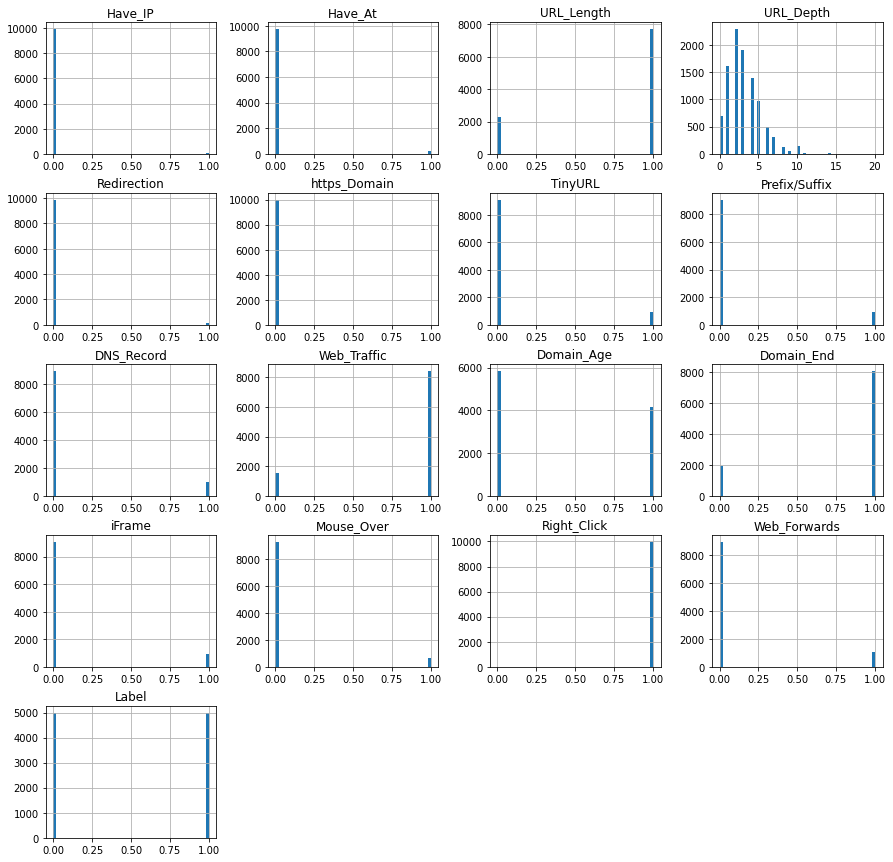

In [ ]:
data.hist(bins = 50,figsize = (15,15))
plt.show()

In [ ]:
data.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


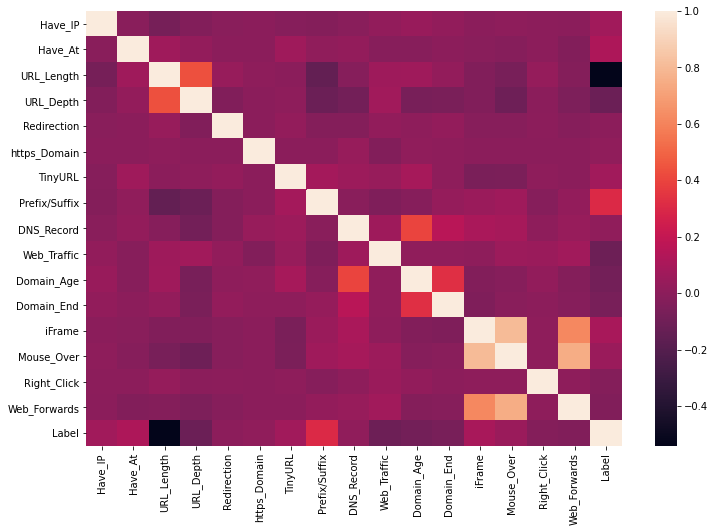

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr())

plt.savefig('plotcheck.png')
plt.show()

In [ ]:
data = data.drop(['Domain'], axis = 1).copy()
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1
1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
2,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0,0,1,3,0,0,0,1,0,0,1,1,0,0,1,0,1
4,0,0,1,2,0,0,0,0,0,1,0,1,1,1,1,1,1


In [ ]:
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## We import three classes from the scikit learn library to check if our data is returning any result

Decision Tree: Accuracy on training Data: 0.811
Decision Tree: Accuracy on test Data: 0.819


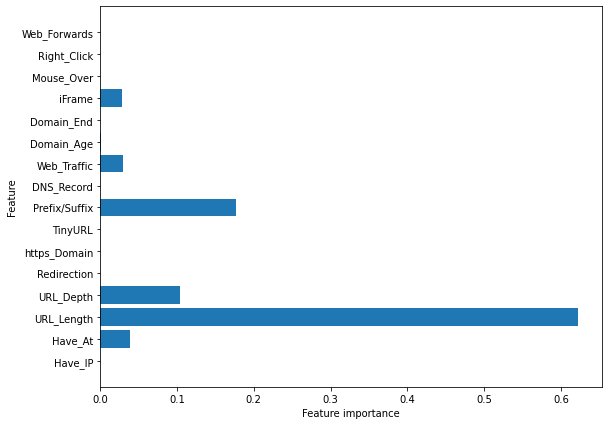

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)

y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

storeResults('Decision Tree', acc_train_tree, acc_test_tree)

Random forest: Accuracy on training Data: 0.817
Random forest: Accuracy on test Data: 0.825


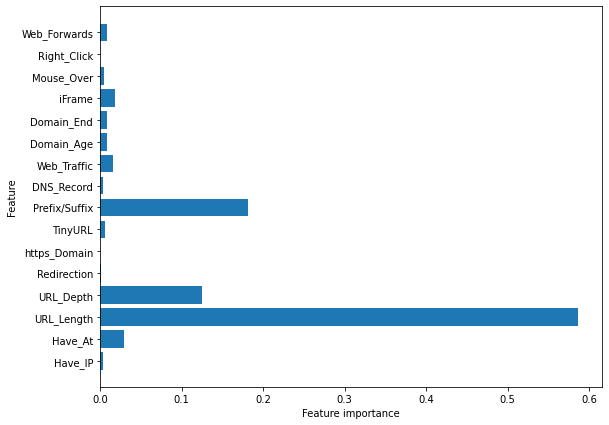

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)

y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100])) 
mlp.fit(X_train, y_train)

y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

Multilayer Perceptrons: Accuracy on training Data: 0.857
Multilayer Perceptrons: Accuracy on test Data: 0.863


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=12)
svm.fit(X_train, y_train)

y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)


acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))


storeResults('SVM', acc_train_svm, acc_test_svm)

SVM: Accuracy on training Data: 0.800
SVM : Accuracy on test Data: 0.808


In [ ]:
from math import e
class Node:

    def __init__(self, x, gradient, hessian, idxs, subsample_cols = 0.8 , min_leaf = 5, min_child_weight = 1 ,depth = 10, lambda_ = 1, gamma = 1, eps = 0.1):
      
        self.x, self.gradient, self.hessian = x, gradient, hessian
        self.idxs = idxs 
        self.depth = depth
        self.min_leaf = min_leaf
        self.lambda_ = lambda_
        self.gamma  = gamma
        self.min_child_weight = min_child_weight
        self.row_count = len(idxs)
        self.col_count = x.shape[1]
        self.subsample_cols = subsample_cols
        self.eps = eps
        self.column_subsample = np.random.permutation(self.col_count)[:round(self.subsample_cols*self.col_count)]
        
        self.val = self.compute_gamma(self.gradient[self.idxs], self.hessian[self.idxs])
          
        self.score = float('-inf')
        self.find_varsplit()
        
        
    def compute_gamma(self, gradient, hessian):
        return(-np.sum(gradient)/(np.sum(hessian) + self.lambda_))
        
    def find_varsplit(self):
        for c in self.column_subsample: self.find_greedy_split(c)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x <= self.split)[0]
        rhs = np.nonzero(x > self.split)[0]
        self.lhs = Node(x = self.x, gradient = self.gradient, hessian = self.hessian, idxs = self.idxs[lhs], min_leaf = self.min_leaf, depth = self.depth-1, lambda_ = self.lambda_ , gamma = self.gamma, min_child_weight = self.min_child_weight, eps = self.eps, subsample_cols = self.subsample_cols)
        self.rhs = Node(x = self.x, gradient = self.gradient, hessian = self.hessian, idxs = self.idxs[rhs], min_leaf = self.min_leaf, depth = self.depth-1, lambda_ = self.lambda_ , gamma = self.gamma, min_child_weight = self.min_child_weight, eps = self.eps, subsample_cols = self.subsample_cols)
        
    def find_greedy_split(self, var_idx):
        x = self.x.values[self.idxs, var_idx]
        
        for r in range(self.row_count):
            lhs = x <= x[r]
            rhs = x > x[r]
            
            lhs_indices = np.nonzero(x <= x[r])[0]
            rhs_indices = np.nonzero(x > x[r])[0]
            if(rhs.sum() < self.min_leaf or lhs.sum() < self.min_leaf 
               or self.hessian[lhs_indices].sum() < self.min_child_weight
               or self.hessian[rhs_indices].sum() < self.min_child_weight): continue

            curr_score = self.gain(lhs, rhs)
            if curr_score > self.score: 
                self.var_idx = var_idx
                self.score = curr_score
                self.split = x[r]
                
    def weighted_qauntile_sketch(self, var_idx):
        x = self.x.values[self.idxs, var_idx]
        hessian_ = self.hessian[self.idxs]
        df = pd.DataFrame({'feature':x,'hess':hessian_})
        
        df.sort_values(by=['feature'], ascending = True, inplace = True)
        hess_sum = df['hess'].sum() 
        df['rank'] = df.apply(lambda x : (1/hess_sum)*sum(df[df['feature'] < x['feature']]['hess']), axis=1)
        
        for row in range(df.shape[0]-1):
            # look at the current rank and the next ran
            rk_sk_j, rk_sk_j_1 = df['rank'].iloc[row:row+2]
            diff = abs(rk_sk_j - rk_sk_j_1)
            if(diff >= self.eps):
                continue
                
            split_value = (df['rank'].iloc[row+1] + df['rank'].iloc[row])/2
            lhs = x <= split_value
            rhs = x > split_value
            
            lhs_indices = np.nonzero(x <= split_value)[0]
            rhs_indices = np.nonzero(x > split_value)[0]
            if(rhs.sum() < self.min_leaf or lhs.sum() < self.min_leaf 
               or self.hessian[lhs_indices].sum() < self.min_child_weight
               or self.hessian[rhs_indices].sum() < self.min_child_weight): continue
                
            curr_score = self.gain(lhs, rhs)
            if curr_score > self.score: 
                self.var_idx = var_idx
                self.score = curr_score
                self.split = split_value
                
    def gain(self, lhs, rhs):
        gradient = self.gradient[self.idxs]
        hessian  = self.hessian[self.idxs]
        
        lhs_gradient = gradient[lhs].sum()
        lhs_hessian  = hessian[lhs].sum()
        
        rhs_gradient = gradient[rhs].sum()
        rhs_hessian  = hessian[rhs].sum()
        
        gain = 0.5 *( (lhs_gradient**2/(lhs_hessian + self.lambda_)) + (rhs_gradient**2/(rhs_hessian + self.lambda_)) - ((lhs_gradient + rhs_gradient)**2/(lhs_hessian + rhs_hessian + self.lambda_))) - self.gamma
        return(gain)
                
    @property
    def split_col(self):
        return self.x.values[self.idxs , self.var_idx]
                
    @property
    def is_leaf(self):

        return self.score == float('-inf') or self.depth <= 0                 

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])
    
    def predict_row(self, xi):
        if self.is_leaf:
            return(self.val)

        node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
        return node.predict_row(xi)

    
class XGBoostTree:
    def fit(self, x, gradient, hessian, subsample_cols = 0.8 , min_leaf = 5, min_child_weight = 1 ,depth = 10, lambda_ = 1, gamma = 1, eps = 0.1):
        self.dtree = Node(x, gradient, hessian, np.array(np.arange(len(x))), subsample_cols, min_leaf, min_child_weight, depth, lambda_, gamma, eps)
        return self
    
    def predict(self, X):
        return self.dtree.predict(X.values)
   
   
class XGBoostClassifier:
    def __init__(self):
        self.estimators = []
    
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def grad(self, preds, labels):
        preds = self.sigmoid(preds)
        return(preds - labels)

    def hess(self, preds, labels):
        preds = self.sigmoid(preds)
        return(preds * (1 - preds))
    
    @staticmethod
    def log_odds(column):
        binary_yes = np.count_nonzero(column == 1)
        binary_no  = np.count_nonzero(column == 0)
        return(np.log(binary_yes/binary_no))
    
    
    def fit(self, X, y, subsample_cols = 0.8 , min_child_weight = 1, depth = 5, min_leaf = 5, learning_rate = 0.4, boosting_rounds = 5, lambda_ = 1.5, gamma = 1, eps = 0.1):
        self.X, self.y = X, y.values
        self.depth = depth
        self.subsample_cols = subsample_cols
        self.eps = eps
        self.min_child_weight = min_child_weight 
        self.min_leaf = min_leaf
        self.learning_rate = learning_rate
        self.boosting_rounds = boosting_rounds 
        self.lambda_ = lambda_
        self.gamma  = gamma
    
        self.base_pred = np.full((X.shape[0], 1), 1).flatten().astype('float64')
    
        for booster in range(self.boosting_rounds):
            Grad = self.grad(self.base_pred, self.y)
            Hess = self.hess(self.base_pred, self.y)
            boosting_tree = XGBoostTree().fit(self.X, Grad, Hess, depth = self.depth, min_leaf = self.min_leaf, lambda_ = self.lambda_, gamma = self.gamma, eps = self.eps, min_child_weight = self.min_child_weight, subsample_cols = self.subsample_cols)
            self.base_pred += self.learning_rate * boosting_tree.predict(self.X)
            self.estimators.append(boosting_tree)
          
    def predict_proba(self, X):
        pred = np.zeros(X.shape[0])
        
        for estimator in self.estimators:
            pred += self.learning_rate * estimator.predict(X) 
          
        return(self.sigmoid(np.full((X.shape[0], 1), 1).flatten().astype('float64') + pred))
    
    def predict(self, X):
        pred = np.zeros(X.shape[0])
        for estimator in self.estimators:
            pred += self.learning_rate * estimator.predict(X) 
        
        predicted_probas = self.sigmoid(np.full((X.shape[0], 1), 1).flatten().astype('float64') + pred)
        preds = np.where(predicted_probas > np.mean(predicted_probas), 1, 0)
        return(preds)
       


In [ ]:
xgb = XGBoostClassifier()
xgb.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
y_pred = xgb.predict(X_train)

In [ ]:
accuracy_score(y_train,y_pred)

0.818875

In [ ]:
import joblib
joblib.dump(xgb, 'xgb.pkl')

['xgb.pkl']

## Part 3 - Formation of report

In [ ]:
from fpdf import FPDF

In [ ]:
def create_report():
    f = features()
    arr = f.featureExtraction("https://www.youtube.com/watch?v=UbCWoMf80PY",0)
    
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size = 20)
    
    pdf.cell(200, 10, txt = "Report of URL", ln = 1, align = 'C')
    
    pdf.cell(200, 10, txt = "",ln = 2, align = 'C')
    
    pdf.set_font("Arial", size = 15)
    pdf.cell(200, 10, txt = "Domain of the URL: {}".format(arr[0]),ln = 3, align = 'J')
    pdf.cell(200, 10, txt = "Do the URL contain IP: {}".format(arr[1]),ln = 4, align = 'J')
    pdf.cell(200, 10, txt = "Does it have @ sine: {}".format(arr[2]),ln=5 ,align = 'J')
    pdf.cell(200, 10, txt = "Length of URL: {}".format(arr[3]),ln = 6, align = 'J')
    pdf.cell(200, 10, txt = "Is the URL very deep: {}".format(arr[4]),ln = 7, align = 'J')
    pdf.cell(200, 10, txt = "Does it redirect: {}".format(arr[5]),ln = 8, align = 'J')
    pdf.cell(200, 10, txt = "Does it follow HTTP protocol: {}".format(arr[6]),ln = 9, align = 'J')
    pdf.cell(200, 10, txt = "Is the URL very small: {}".format(arr[7]),ln = 10, align = 'J')
    pdf.cell(200, 10, txt = "Does it have misleading prefix or suffix: {}".format(arr[8]),ln = 11, align = 'J')
    pdf.cell(200, 10, txt = "Does it have DNS: {}".format(arr[9]),ln = 12, align = 'J')
    pdf.cell(200, 10, txt = "Does it have enough Web Traffic: {}".format(arr[10]),ln = 13, align = 'J')
    pdf.cell(200, 10, txt = "Does it have enough Domain Age: {}".format(arr[11]),ln = 14, align = 'J')
    pdf.cell(200, 10, txt = "Does it have enough Domain End: {}".format(arr[12]),ln = 15, align = 'J')
    pdf.cell(200, 10, txt = "iframe: {}".format(arr[13]),ln = 16, align = 'J')
    pdf.cell(200, 10, txt = "mouseover: {}".format(arr[14]),ln = 17, align = 'J')
    pdf.cell(200, 10, txt = "rightclick: {}".format(arr[15]),ln = 18, align = 'J')
    pdf.cell(200, 10, txt = "Does it forward you further: {}".format(arr[16]),ln = 19, align = 'J')
    pdf.cell(200, 20, txt = "",ln = 20, align = 'J')
    pdf.add_page()
    pdf.cell(200, 20, txt = "Through the following graph you can compare your report with others",ln = 21, align = 'c')
    
    pdf.image('plotcheck.png',w=175,h=128)
    
    pdf.add_page()
    pdf.set_font("Arial", size = 17)
    pdf.cell(200, 30, txt = "Meaning of the Report", ln = 1, align = 'C')
    pdf.set_font("Arial", size = 12)
    pdf.cell(200, 20, txt = "We will try to explain what you can infer from the above document", ln = 2, align = 'J')
    
    pdf.cell(200, 10, txt = 'If an IP address is used as an alternative of the domain name in the URL, such as', ln = 3, align = 'J')
    pdf.cell(200,10,txt ='http://125.98.3.123/fake.html , users can be sure that someone is trying to steal ',  ln = 3, align = 'J')
    pdf.cell(200,10,txt ='their personal information. Sometimes, the IP address is even transformed into ',  ln = 3, align = 'J')
    pdf.cell(200,10,txt = 'hexadecimal code as shown in the following link http://0x58.0xCC.0xCA.0x62/2/paypal.ca/index.html.', ln = 3, align = 'J')
 
    pdf.cell(200, 20, txt = "Long URL can hide information therefore length of URL is calculated", ln = 4, align = 'J')
    
    
    pdf.cell(200, 10, txt = "Such Websites have less age and usually a closer ending period and most of the time they ", ln = 5, align = 'J')
    pdf.cell(200, 10, txt ="are missing the domain ", ln = 5, align = 'J')
   
    pdf.cell(200, 10, txt = "Web traffic measures the popularity of the website by determining the number of visitors and", ln = 5, align = 'J')        
    pdf.cell(200, 10, txt = ' the number of pages they visit. However, since phishing websites live for a short ', ln = 5, align = 'J')
    pdf.cell(200, 10, txt = "period of time, they may not be recognized by the Alexa database (Alexa the Web ", ln = 5, align = 'J')
    pdf.cell(200, 10, txt = "Information Company., 1996). By reviewing our dataset, we find that in worst scenarios,", ln = 5, align = 'J')
    pdf.cell(200, 10, txt =  "legitimate websites ranked among the top 100,000. Furthermore, if the domain has no traffic", ln = 5, align = 'J')
    pdf.cell(200, 10, txt =  'or is not recognized by the Alexa database, it is classified as Phishing.', ln = 6, align = 'J')
    pdf.cell(200, 20, txt = 'IFrame is an HTML tag used to display an additional webpage into', ln = 7, align = 'J')
    pdf.cell(200, 20, txt = 'one that is currently shown. Phishers can make use of the iframe tag and make it invisible', ln = 7, align = 'J')
    pdf.cell(200, 20, txt = 'i.e. without frame borders. In this regard, phishers make use of the frameBorder attribute which causes', ln = 7, align = 'J') 
    pdf.cell(200, 20, txt = 'the browser to render a visual delineation', ln = 7, align = 'J')
    pdf.set_font("Arial", size = 17)
    pdf.cell(200,20,txt = 'REFERENCES', ln = 8, align = 'C')
    
    pdf.set_font("Arial", size = 12)
    pdf.cell(200,5,txt = 'Mohammad, R.M., Thabtah, F. and McCluskey, L., 2015.',ln=9,align = 'C')
    pdf.cell(200,5,txt =  'Phishing websites features. ',ln=9,align = 'C')
    pdf.cell(200,5,txt = 'School of Computing and Engineering, University of Huddersfield.',ln=9,align = 'C')
    pdf.output("report.pdf")  
    
create_report() 